In [22]:
# Italy
## Proyecto Final. Alma Lagunas. 

In [33]:
using PyPlot #Cargamos la Libreria;
using SeisIO #cargamos la libreria;
using DSP #CARGAMOS LIBRERIA;

In [34]:
st=readmseed("BERNI_FUORN_Thurweiser_SwissSeismologicalService.mseed")

SeisData with 6 channels (1 shown)
    ID: CH.BERNI..HHE                                                   ...
  NAME: CH.BERNI..HHE                                                   ...
   LOC: 0.000, 0.000, 0.000                                             ...
    FS: 120                                                             ...
  GAIN: 1.000e+00                                                       ...
  RESP:                                                                 ...
                                                                        ...
 UNITS:                                                                 ...
   SRC:                                                                 ...
 NOTES: 1 entries                                                       ...
  MISC: 0 items                                                         ...
     T: 2004-09-18T10:41:57 (0 gaps)                                    ...
     X: -6.200e+01                                   

In [35]:
st[1].id
st[2].id
st[3].id
st[4].id
st[5].id
st[6].id

"CH.FUORN..HHZ"

In [36]:
HHE=st[1]
HHN=st[2]
HHZ=st[3]

SeisChannel with 864846 samples
    ID: CH.BERNI..HHZ                                                   
  NAME: CH.BERNI..HHZ                                                   
   LAT: 0.0                                                             
   LON: 0.0                                                             
   ELE: 0.0                                                             
    AZ: 0.0                                                             
   INC: 0.0                                                             
    FS: 120.0                                                           
  GAIN: 1.000e+00                                                       
  RESP:                                                                 
                                                                        
 UNITS:                                                                 
   SRC:                                                                 
 NOTES: 1 entries  

In [37]:
tsHHE = collect(0:length(HHE.x)-1)*(1/HHE.fs);

In [38]:
tsHHN = collect(0:length(HHN.x)-1)*(1/HHN.fs);

In [39]:
tsHHZ = collect(0:length(HHZ.x)-1)*(1/HHZ.fs);

In [40]:
# Elimintar tendencia lineal
function rtrend(t,x)
    x0, x1 = linreg(t,x)
    x = x - (x0 + x1*t)
    return x
end 

rtrend (generic function with 1 method)

In [41]:
data = HHE.x;
data = data - mean(data)
data = rtrend(tsHHE,data);

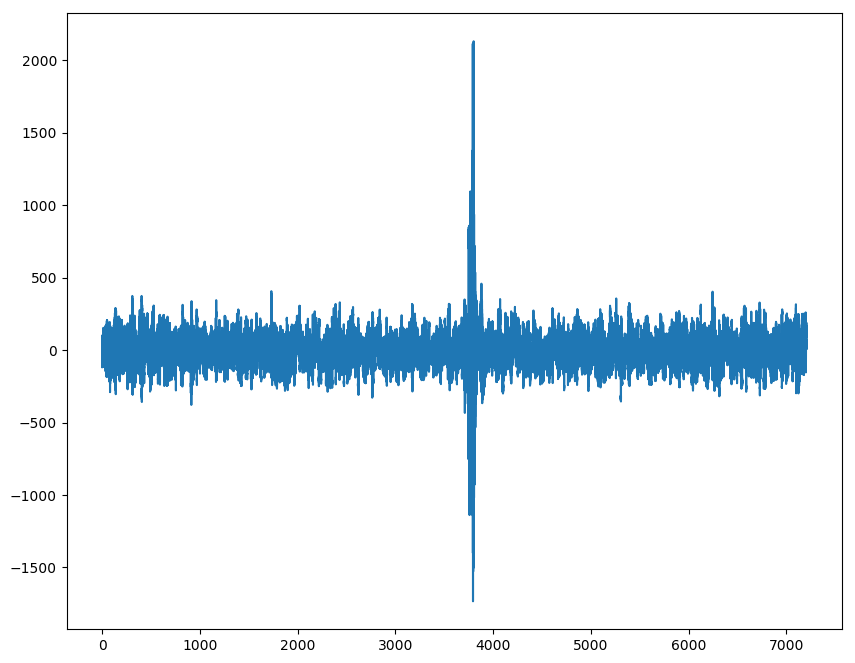

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12f470990>

In [42]:
fig = figure(figsize=(10,8))
plot(tsHHE,data)

In [17]:
dsB = 1/((1/HHE.fs)*length(data));
nn = convert(Int32,floor(length(data)/2)+1)

432446

In [18]:
fre = collect(0:length(data))*dsB;

In [19]:
Bff = fft(data,1)
Bff[1] = 0

0

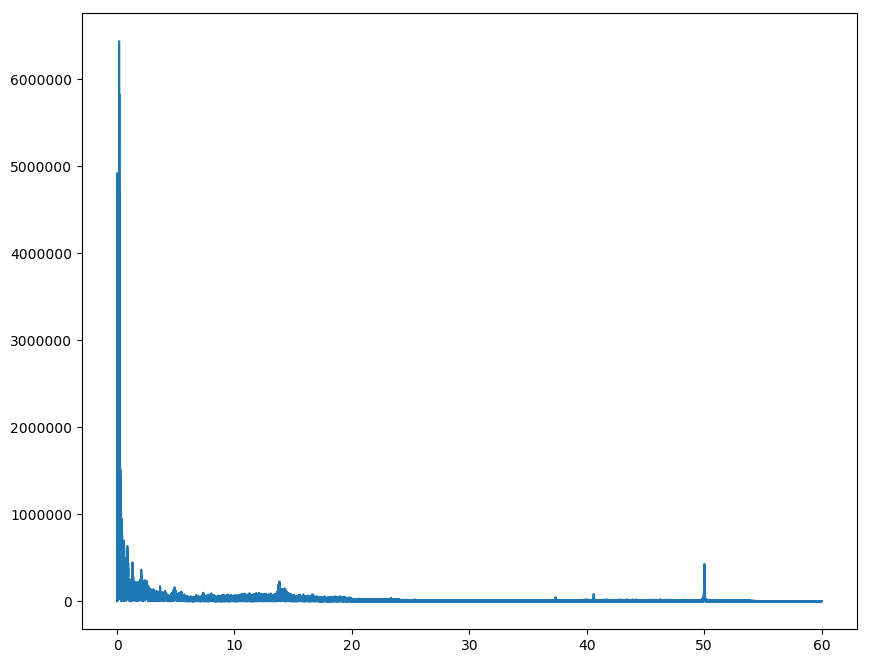

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12a6328d0>

In [20]:

fig = figure(figsize=(10,8))
plot(fre[1:nn],abs.(Bff[1:nn]))

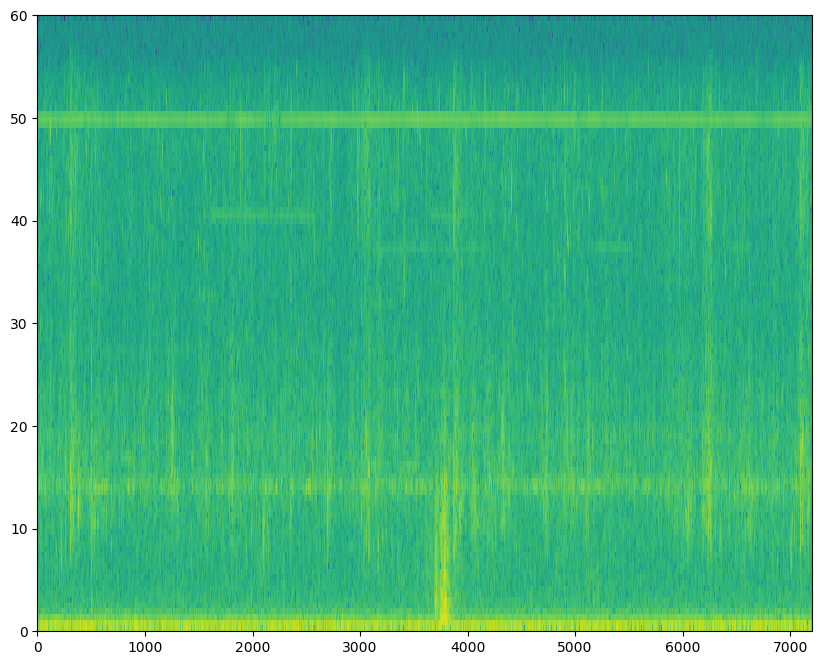

In [32]:
#Espectrograma
fig = figure(figsize=(10,8))
specgram(data,216,HHE.fs,pad_to=216,noverlap=108);